In [ ]:
# %pip install osmx osmx

In [1]:
# %pip install osmx osmnx
import osmnx as ox
import geopandas as gpd
from shapely.geometry import LineString, Point
import pandas as pd
from shapely.ops import split

In [2]:
latitude = 52.69238 
longitude = 16.78041
radius = 2000  # Buffer radius in meters
# Step 2: Fetch forest polygons

forest_tags = {"landuse": "forest", "natural": "wood"}  # Forest-related tags
forest_gdf = ox.features.features_from_point((latitude, longitude), tags=forest_tags, dist=radius)

pavement_tags = {"highway": ["footway", "track", "path", "cycleway"]}
pavements_gdf = ox.features.features_from_point((latitude, longitude), tags=pavement_tags, dist=radius)


In [3]:
pavements_gdf['highway'].value_counts()

highway
track      63
path        8
footway     2
Name: count, dtype: int64

In [4]:
forest_gdf = forest_gdf.to_crs(epsg=4326)
pavements_gdf = pavements_gdf.to_crs(epsg=4326)

In [5]:
pavements_in_forests = gpd.sjoin(pavements_gdf, forest_gdf, how="inner", op="intersects")

C:\Users\mkami\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3318: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


<Axes: >

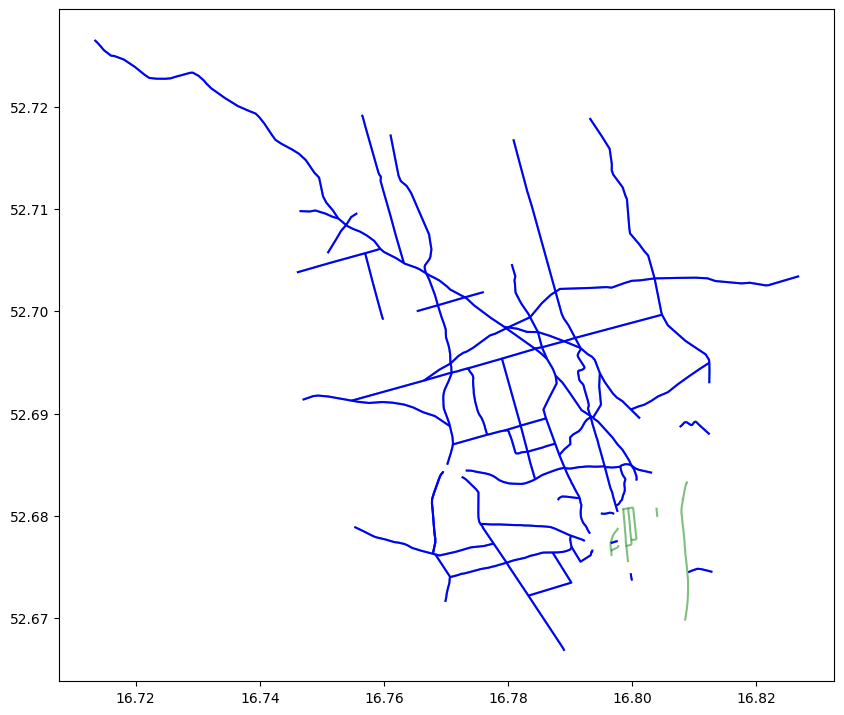

In [6]:
ax = pavements_gdf.plot(color="green", alpha=0.5, figsize=(10, 10), edgecolor="darkgreen")
pavements_in_forests.plot(ax=ax, color="blue", edgecolor="blue")

In [7]:
pavements_gdf = pavements_gdf.explode(index_parts=True)

In [ ]:
pavements_gdf = pavements_gdf[pavements_gdf.geometry.type == "LineString"]  # Filter LineStrings only

In [8]:
list(pavements_gdf.iloc[0].geometry.coords)

[(16.794616, 52.6942747),
 (16.7948176, 52.6939463),
 (16.7956077, 52.6930875),
 (16.7968823, 52.6919928),
 (16.7975305, 52.6915822),
 (16.7984627, 52.6912114),
 (16.7994256, 52.6906367)]

In [9]:
start_points = pavements_gdf.geometry.apply(lambda geom: Point(geom.coords[0]))
end_points = pavements_gdf.geometry.apply(lambda geom: Point(geom.coords[-1]))

In [10]:
nodes_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(pd.concat([start_points, end_points])).drop_duplicates())
nodes_gdf = nodes_gdf.reset_index(drop=True)

In [11]:
# Add x and y columns (longitude and latitude)
nodes_gdf["x"] = nodes_gdf.geometry.x
nodes_gdf["y"] = nodes_gdf.geometry.y

# Assign a unique ID to each node
nodes_gdf["node_id"] = nodes_gdf.index

In [12]:
pavements_gdf

highway  \
element_type osmid                  
way          158195144  0   track   
             158195169  0   track   
             158195190  0   track   
             158195202  0   track   
             158195225  0   track   
...                           ...   
             1331288829 0   track   
             1331288830 0    path   
             1331288831 0   track   
             1331288832 0   track   
             1331288847 0   track   

                                                                       nodes  \
element_type osmid                                                             
way          158195144  0  [1704257876, 1704257874, 1704257741, 170425774...   
             158195169  0  [1704257832, 9688634527, 1704257837, 170425786...   
             158195190  0  [2964357940, 2964357939, 2964357938, 296435793...   
             158195202  0  [1704257943, 12317850181, 1704257952, 51945663...   
             158195225  0  [1704257832, 4290713425, 4290713426, 170425807...   
...                                                                      ...   
             1331288829 0  [12317850199, 12317850200, 12317850201, 123178...   
             1331288830 0  [12317850212, 12317850213, 12317850214, 123178...   
             1331288831 0  [12317850202, 12317850210, 12317850211, 123178...   
             1331288832 0  [12317850212, 12317850222, 12317850223, 123178...   
             1331288847 0             [1704258000, 12317850294, 12317850295]   

                                         source surface tracktype  \
element_type osmid                                                  
way          158195144  0  European Urban Atlas  ground    grade3   
             158195169  0  European Urban Atlas     NaN       NaN   
             158195190  0  European Urban Atlas     NaN    grade2   
             158195202  0  European Urban Atlas     NaN       NaN   
             158195225  0  European Urban Atlas    sand       NaN   
...                                         ...     ...       ...   
             1331288829 0                   NaN     NaN       NaN   
             1331288830 0                   NaN  ground       NaN   
             1331288831 0                   NaN     NaN       NaN   
             1331288832 0                   NaN     NaN       NaN   
             1331288847 0                   NaN     NaN       NaN   

                          unsigned_ref foot horse segregated bicycle  \
element_type osmid                                                     
way          158195144  0          NaN  NaN   NaN        NaN     NaN   
             158195169  0          NaN  NaN   NaN        NaN     NaN   
             158195190  0          NaN  NaN   NaN        NaN     NaN   
             158195202  0          NaN  NaN   NaN        NaN     NaN   
             158195225  0       2058 P  NaN   NaN        NaN     NaN   
...                                ...  ...   ...        ...     ...   
             1331288829 0          NaN  NaN   NaN        NaN     NaN   
             1331288830 0          NaN  NaN   NaN        NaN     NaN   
             1331288831 0          NaN  NaN   NaN        NaN     NaN   
             1331288832 0          NaN  NaN   NaN        NaN     NaN   
             1331288847 0          NaN  NaN   NaN        NaN     NaN   

                                                                    geometry  
element_type osmid                                                            
way          158195144  0  LINESTRING (16.79462 52.69427, 16.79482 52.693...  
             158195169  0  LINESTRING (16.79988 52.68496, 16.79957 52.685...  
             158195190  0  LINESTRING (16.81296 52.67453, 16.81223 52.674...  
             158195202  0  LINESTRING (16.79937 52.67549, 16.79935 52.675...  
             158195225  0  LINESTRING (16.79988 52.68496, 16.79944 52.685...  
...                                                                      ...  
             1331288829 0  LINESTRIN

In [13]:
nodes_gdf

,geometry,x,y,node_id
0,POINT (16.79462 52.69427),16.794616,52.694275,0
1,POINT (16.79988 52.68496),16.799880,52.684957,1
2,POINT (16.81296 52.67453),16.812959,52.674535,2
3,POINT (16.79937 52.67549),16.799370,52.675491,3
4,POINT (16.78912 52.66684),16.789116,52.666837,4
...,...,...,...,...
111,POINT (16.80884 52.68315),16.808836,52.683154,111
112,POINT (16.79784 52.67715),16.797837,52.677149,112
113,POINT (16.79776 52.67885),16.797759,52.678846,113
114,POINT (16.79769 52.67754),16.797693,52.677539,114


In [14]:
def map_point_to_node_id(point, nodes):
    return nodes[nodes.geometry == point].iloc[0]["node_id"]

pavements_gdf["u"] = pavements_gdf.geometry.apply(lambda geom: map_point_to_node_id(Point(geom.coords[0]), nodes_gdf))
pavements_gdf["v"] = pavements_gdf.geometry.apply(lambda geom: map_point_to_node_id(Point(geom.coords[-1]), nodes_gdf))


In [ ]:
G = ox.utils_graph.graph_from_gdfs(nodes_gdf, pavements_gdf)

In [ ]:
# adjacency matrix
import networkx as nx
A = nx.adjacency_matrix(G).todense()


In [ ]:
# sum of rows in A
G.nodes

In [ ]:
# show adjacency matrix
# import networkx as nx
# adj = nx.adjacency_matrix(G).todense()


In [ ]:
# Step 6: Visualization (optional)
ox.plot_graph(G, node_color="red", edge_color="blue", figsize=(10, 10))